In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### Couette Flow as a Non Dimensional PDE

$\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial y^2}$

In [2]:
# Getting our Initial Conditions
N=[11,21,41,81]
dt=[0.001, 0.003, 0.01, 0.03, 0.1]
err=1e-6

def dy(N): #Generates the Y steps given a certain number of points examined
    return 1/(N-1)
def uy0 (N): #Generates the initial velocities at a given number of points
    return np.array([n*dy(N)+np.sin(np.pi*n*dy(N)) for n in range(N)])
def r(N,dt): #a rate constant used in our matrix
    return dt/(dy(N)**2)
#Exact Solution, used for error calculation
def u (t,N):
    return [n*dy(N)+np.exp(-(np.pi**2)*t)*np.sin(np.pi*n*dy(N)) for n in range(N)]

In [3]:
#Take an Existing Thomas algorithm to solve the matrix equation:
#THIS WAS TAKEN FROM: https://gist.github.com/cbellei/8ab3ab8551b8dfc8b081c518ccd9ada9
# and was modified slightly to work better for this problem
def getnextU (N,dt,U):
    d=U
    nf = len(d) # number of equations
    a=np.ones(nf-1)*r(N,dt)
    b=np.ones(nf)*(-(2*r(N,dt)+1))
    b[0]=1 #Boundary Condition
    b[-1]=-1 #Boundary Condition
    c=np.ones(nf-1)*r(N,dt)
    c[0]=0 #Boundary Condition
    a[-1]=0 #Boundary Condition
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [4]:
def couette (N,dt,err): #Generate our Couette velocities at increasing time steps untl the error we get is smaller than the error we specified
    t=0 #Initializing
    U=[uy0(N)]

    e1=np.sum(np.abs((U[-1]-u(t=t,N=N))/(N-2))) #error 1 as used in the function
    e2=np.sum(np.sum(np.abs((U[-1]-dy(N)*N))/(N-2))) #error 2 as used in the function
    err1=[e1] #The error that is stored for the data
    err2=[e2]
    while e2>err and t<1000:
        Uexp=(getnextU(N,dt, U=-U[-1])) #Get our velocities for this time step
        e1=np.sum(np.abs((U[-1]-u(t=t,N=N))/(N-2))) #error for this time step
        e2=np.sum(np.abs((U[-1]-[dy(N)*n for n in range(N)]))/(N-2))
        t+=dt #keep track of time passed since initialization
        U.append(Uexp) #add this velocity profile to our matrix
        err1.append(e1)
        err2.append(e2)
    return (U,t,err1,err2)

This Next Cell Generates the Code for all of the N and dt values in the problem

In [5]:
coudata=[]
for spacing in N: #collect the couette data for these N values
    for time in dt: #collect the data for these delta t values
        U,t,err1,err2=couette(N=spacing,dt=time,err=err)
        coudata.append([spacing,time,U,t,err1,err2])

These next cells run the algorithm for the given values to generate the .csv file

In [6]:
def write_data(time, yvals, numsol, exsol):
    for j in range(len(time)):
        for k in range(len(yvals)):
            num = numsol[j][k]
            ex = exsol[j][k]
    
            columns = ((j),(tvals[j]),(k),(num),(ex))
            with open('data.csv', 'a') as data:
                data_writer=csv.writer(data)
                data_writer.writerow(columns)
            
def write_errs(time, err1, err2):
    for j in range(len(time)):
        columns = ((j),(tvals[j]),(err1[j]),(err2[j]))
        with open('errors.csv', 'a') as errors:
            error_writer=csv.writer(errors)
            error_writer.writerow(columns)

In [7]:
with open('data.csv','w',newline='') as data:
    writer=csv.writer(data)
    data_write=csv.writer(data)
    data_write.writerow(['iteration','time','y position' , 'Calculated Solution,Exact Solution'])
with open('errors.csv','w',newline='') as errors:
    writer=csv.writer(errors)
    errors_write=csv.writer(errors)
    errors_write.writerow (['iteration' , 'time' , 'Error 1' , 'Error 2'] )


choice_N = 21
choice_dt = 0.003
datafiles = np.array(couette(choice_N, choice_dt, 1e-6))#gives me err1, err2, and calculated U

exact = []
tvals = []
yvals = np.arange(0., 1+dy(choice_N), dy(choice_N))
for time in np.arange(0,datafiles[1]+choice_dt,choice_dt):
    tvals.append(time)
    exact.append(u(time,choice_N))

exact = np.array(exact)
write_data(tvals, yvals, datafiles[0], exact)
write_errs(tvals, datafiles[2], datafiles[3])

In [8]:
with open('data.csv','w',newline='') as data:
    writer=csv.writer(data)
    writer.writerow(['iteration','time', 'y position' , 'Calculated Solution', 'Exact Solution'])
with open('errors.csv','w',newline='') as errors:
    writer=csv.writer(errors)
    writer.writerow (['iteration' , 'time' , 'Error 1' , 'Error 2' ])


choice_N = 21
choice_dt = 0.003
datafiles = np.array(couette(choice_N, choice_dt, 1e-6))#gives me err1, err2, and calculated U

exact = []
tvals = []
yvals = np.arange(0., 1+dy(choice_N), dy(choice_N))
for time in np.arange(0,datafiles[1]+choice_dt,choice_dt):
    tvals.append(time)
    exact.append(u(time,choice_N))

exact = np.array(exact)
write_data(tvals, yvals, datafiles[0], exact)
write_errs(tvals, datafiles[2], datafiles[3])

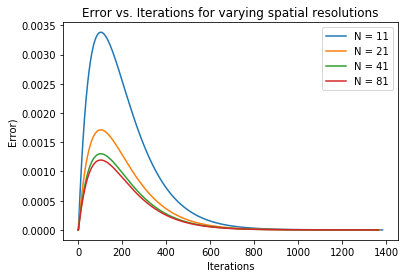

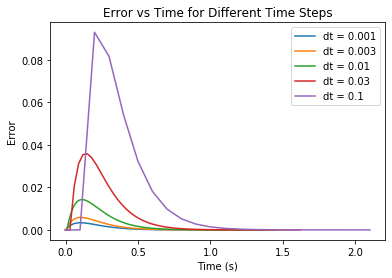

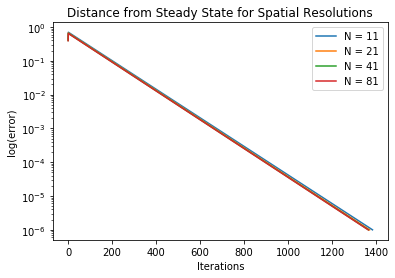

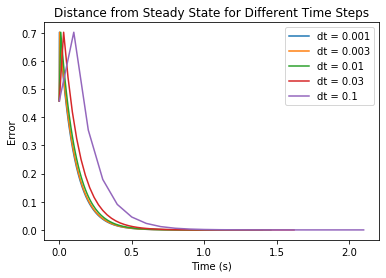

In [9]:
#Generate some Figures:
plt.figure(1)
plt.title('Error vs. Iterations for varying spatial resolutions')
plt.xlabel('Iterations')
plt.ylabel('Error)')
for n in [0, 5, 10, 15]:
    label = 'N = ' + str(coudata[n][0])  
    xs_Nres = []
    ys_Nres = []
    for i in range(len(coudata[n][2])):
        xs_Nres.append(i)
        ys_Nres.append(coudata[n][4][i])
    plt.plot(xs_Nres, ys_Nres, label=label)
    
plt.legend()
plt.savefig('space_itt.png', format='png')
plt.show()

plt.figure(2)
plt.title('Error vs Time for Different Time Steps')
plt.xlabel('Time (s)')
plt.ylabel('Error')
for n in [0, 1, 2, 3,4]:
    label = 'dt = ' + str(coudata[n][1])  
    xs_Nres = []
    ys_Nres = []
    for i in range(len(coudata[n][2])):
        xs_Nres.append(i*coudata[n][1])
        ys_Nres.append(coudata[n][4][i])
    plt.plot(xs_Nres, ys_Nres, label=label)
    
plt.legend()
plt.savefig('time_itt.png', format='png')
plt.show()

plt.figure(3)
plt.title('Distance from Steady State for Spatial Resolutions')
plt.xlabel('Iterations')
plt.ylabel('log(error)')
plt.yscale('log')
for n in [0, 5, 10, 15]:
    label = 'N = ' + str(coudata[n][0])  
    xs_Nres = []
    ys_Nres = []
    for i in range(len(coudata[n][2])):
        xs_Nres.append(i)
        ys_Nres.append(coudata[n][5][i])
    plt.plot(xs_Nres, ys_Nres, label=label)
    
plt.legend()
plt.savefig('space_err.png', format='png')
plt.show()

plt.figure(4)
plt.title('Distance from Steady State for Different Time Steps')
plt.xlabel('Time (s)')
plt.ylabel('Error')
for n in [0, 1, 2, 3,4]:
    label = 'dt = ' + str(coudata[n][1])  
    xs_Nres = []
    ys_Nres = []
    for i in range(len(coudata[n][2])):
        xs_Nres.append(i*coudata[n][1])
        ys_Nres.append(coudata[n][5][i])
    plt.plot(xs_Nres, ys_Nres, label=label)
    
plt.legend()
plt.savefig('time_err.png', format='png')
plt.show()